# Plotting and Visualization

In [32]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [33]:
%matplotlib notebook

## 9.1 A Brief matplotlib API Primer

In [34]:
import matplotlib.pyplot as plt

In [35]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


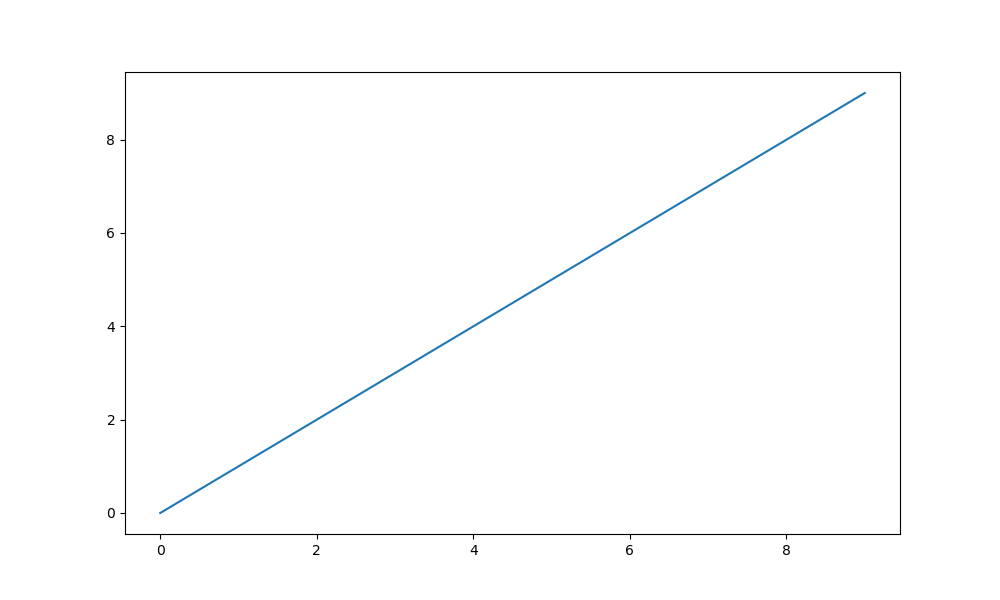

In [36]:
plt.plot(data)

### Figures and Subplots

<IPython.core.display.Javascript object>


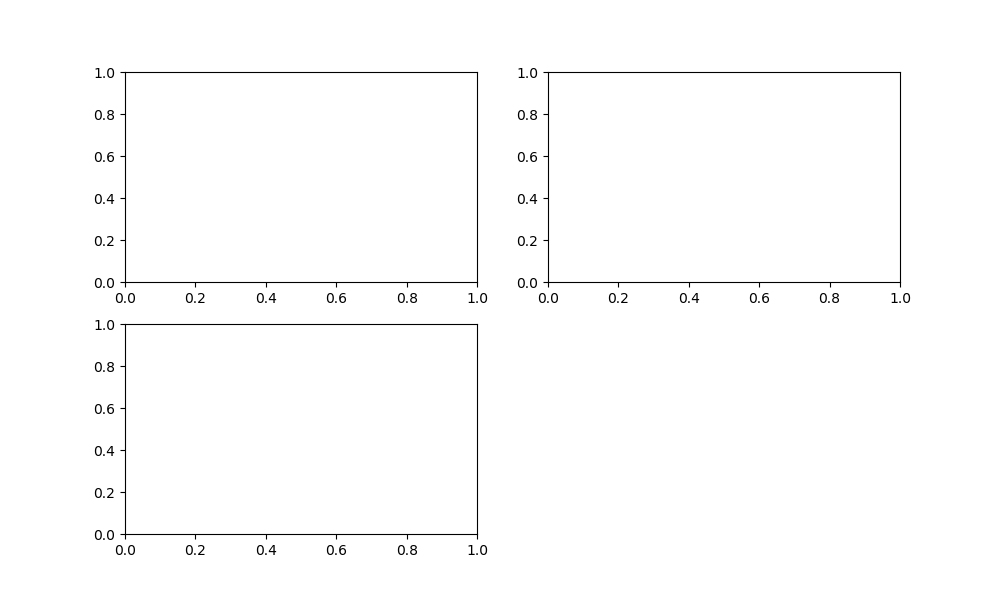

In [82]:
fig = plt.figure()

In [83]:
ax1 = fig.add_subplot(2, 2, 1)

In [84]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


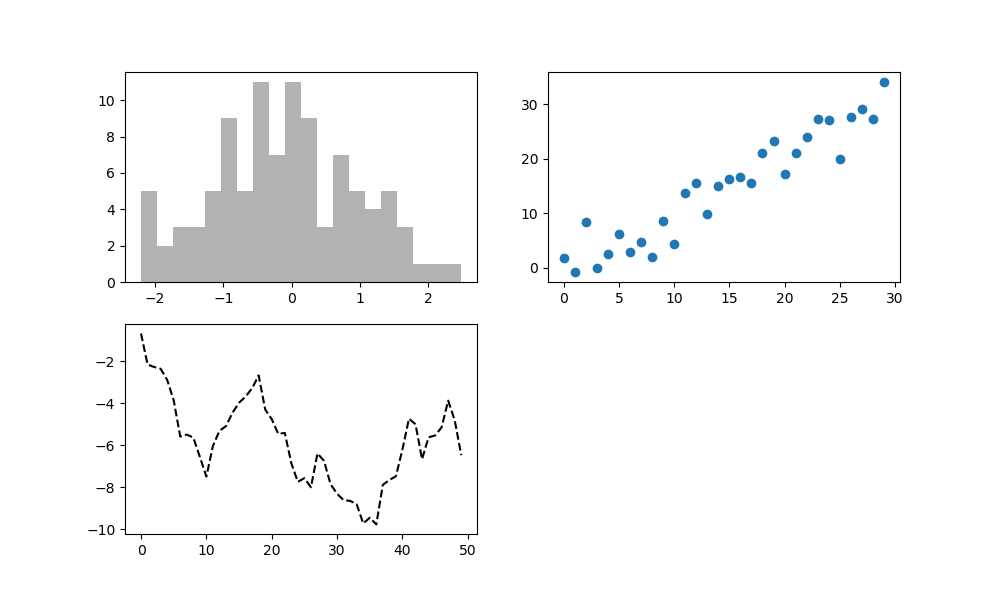

In [85]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [86]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [87]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [88]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [89]:
plt.close('all')

<IPython.core.display.Javascript object>


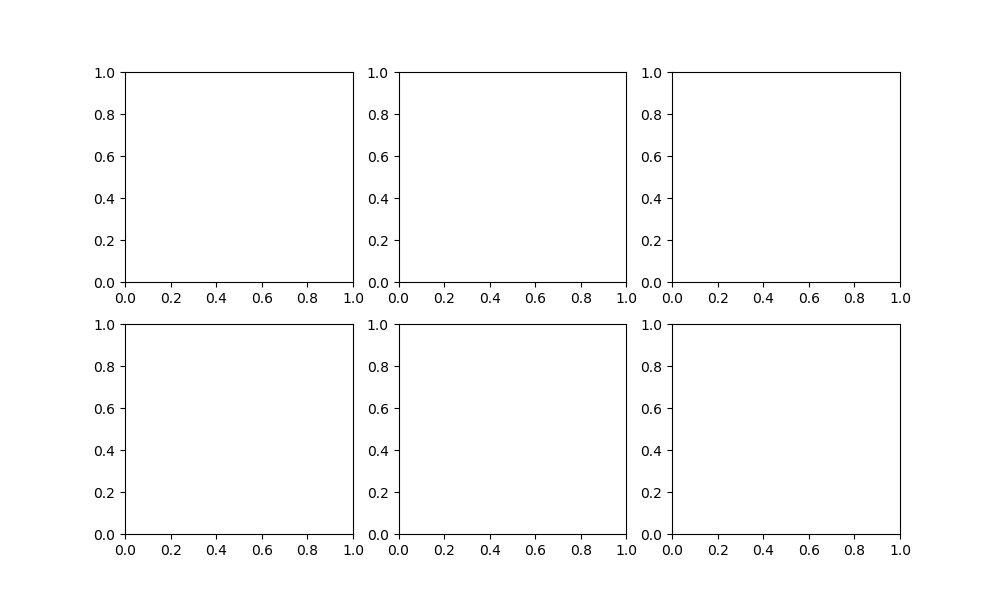

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CF676E240>,
      dtype=object)

In [51]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

In [52]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

<IPython.core.display.Javascript object>


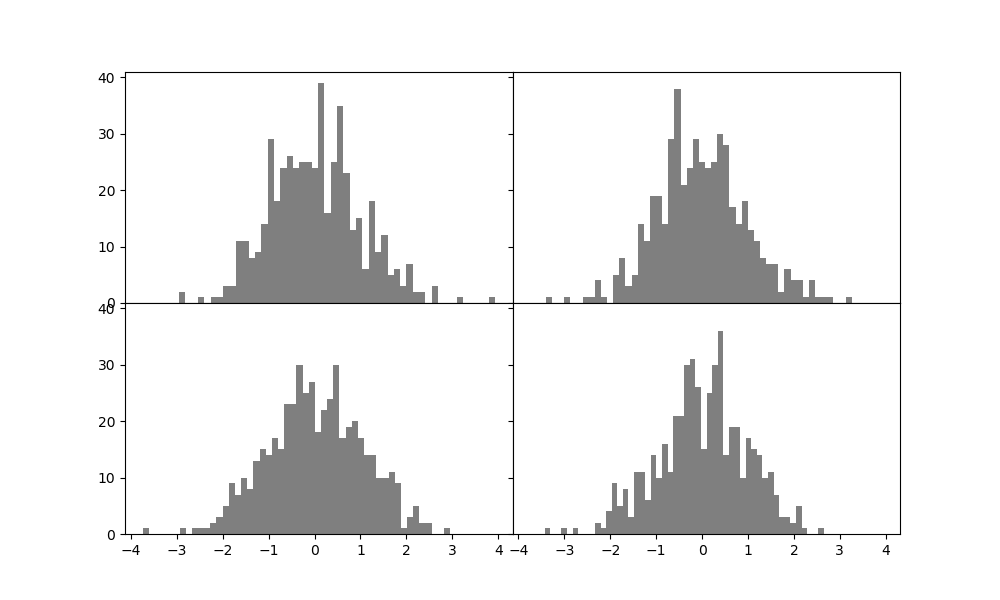

In [53]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [54]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [55]:
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>


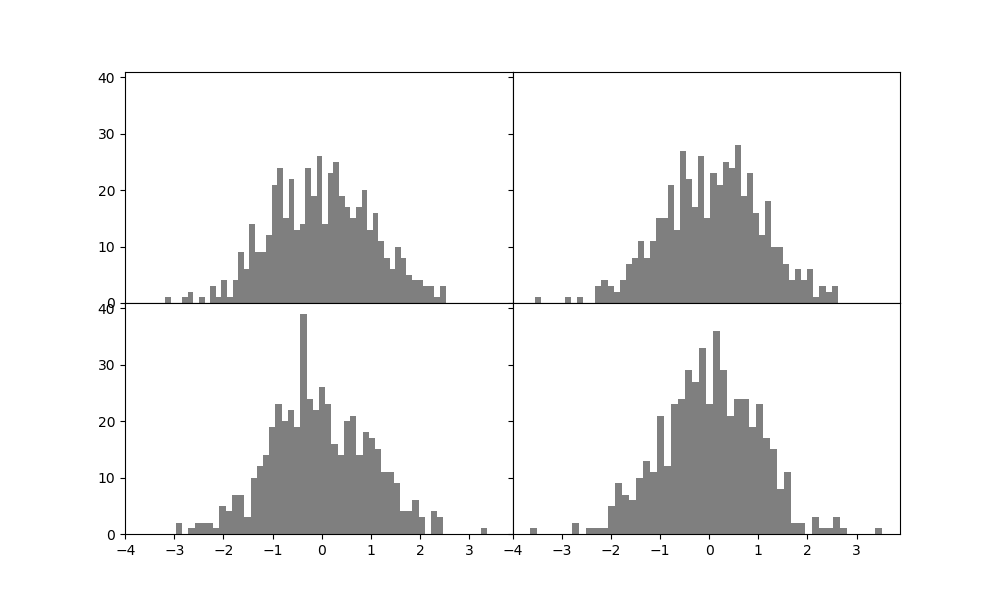

In [56]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

<IPython.core.display.Javascript object>


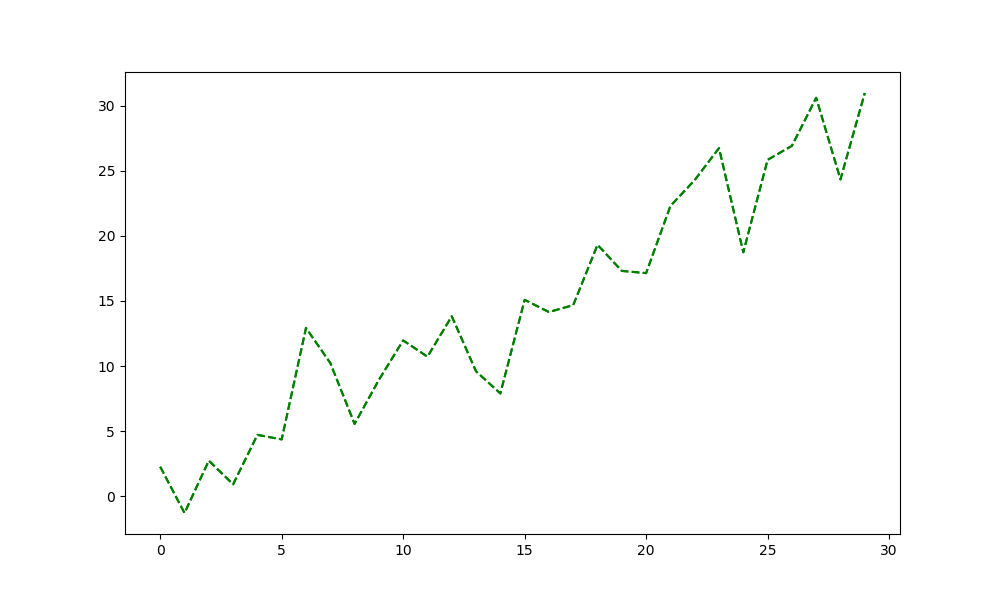

In [77]:
plt.figure()
x = np.arange(30)
y = np.arange(30) + 3 * np.random.randn(30)

plt.plot(x, y, 'g--')

<IPython.core.display.Javascript object>


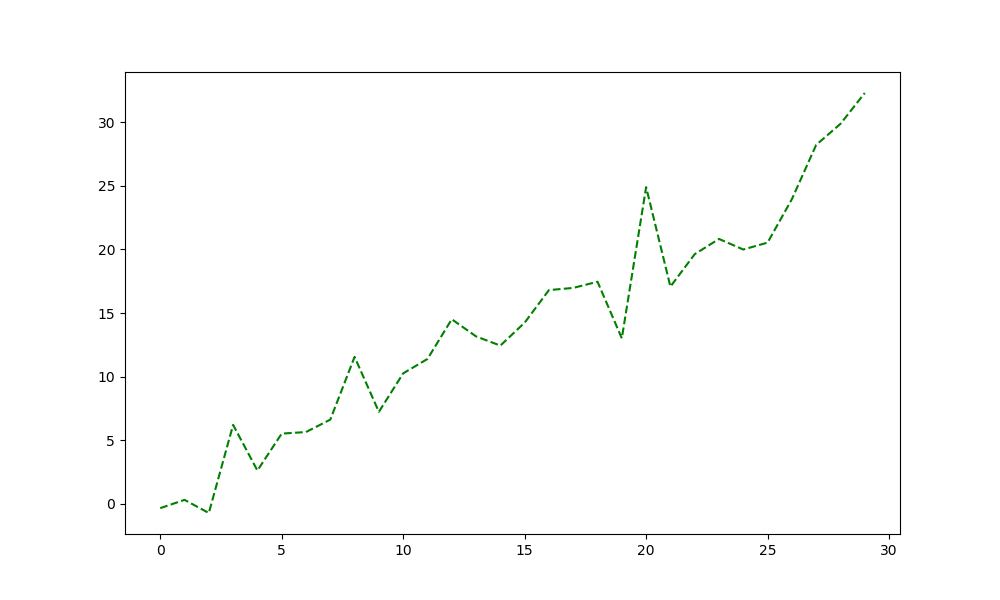

In [79]:
plt.figure()
x = np.arange(30)
y = np.arange(30) + 3 * np.random.randn(30)

plt.plot(x, y, linestyle='--', color='g')

In [59]:
plt.plot?

<IPython.core.display.Javascript object>


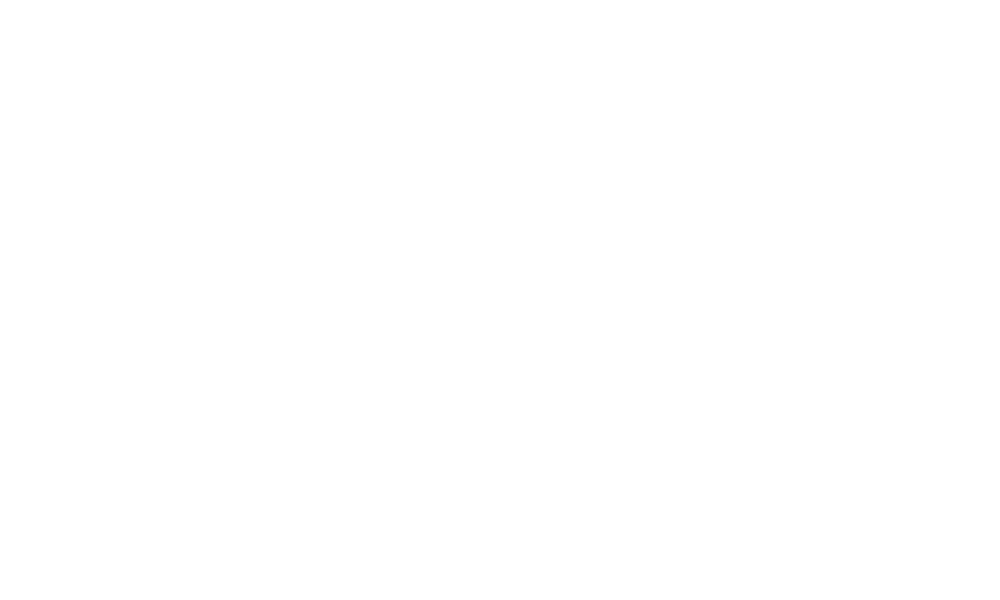

<IPython.core.display.Javascript object>


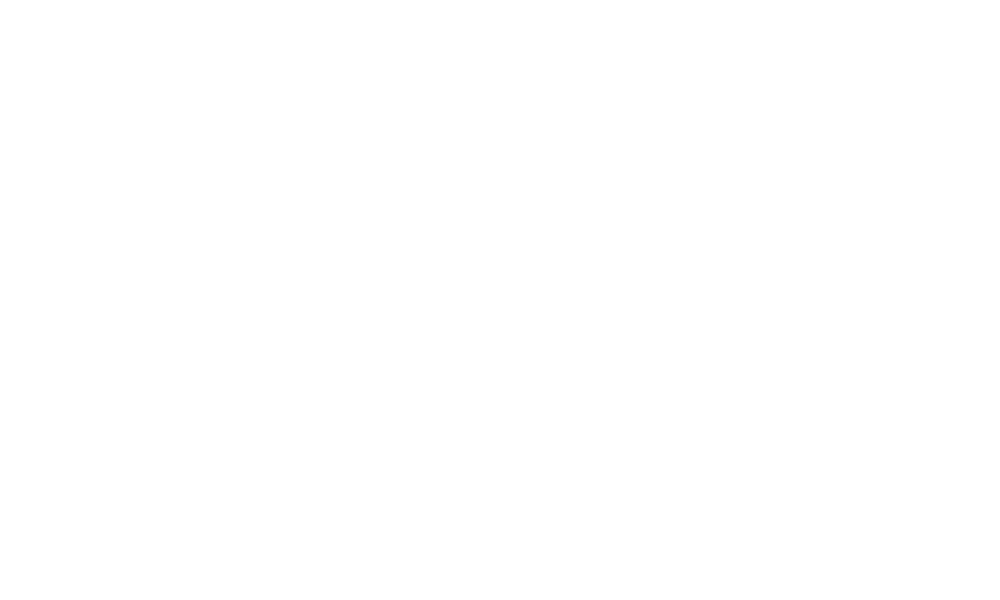

In [80]:
plt.figure()

In [62]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

<IPython.core.display.Javascript object>


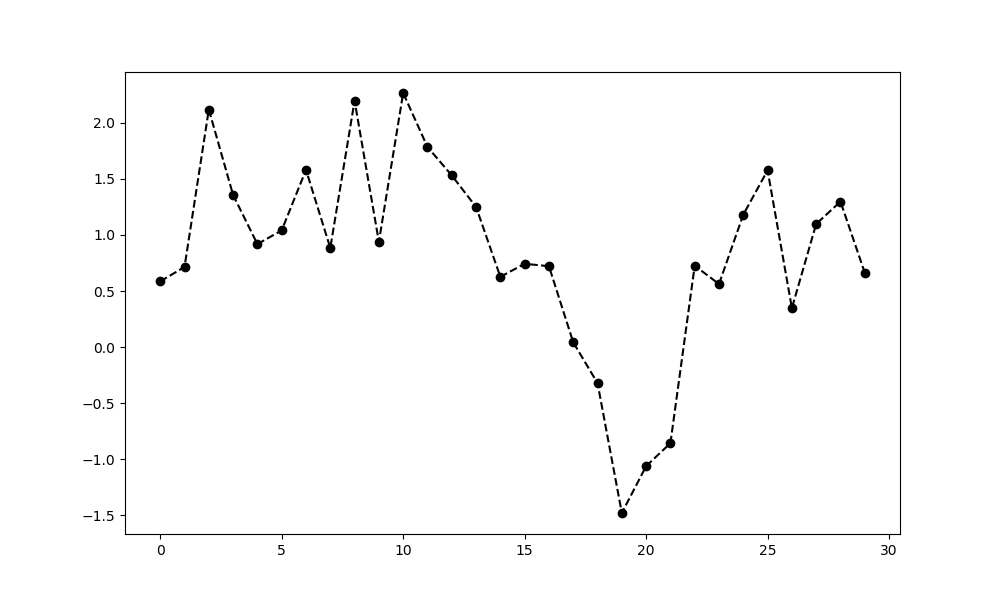

In [63]:
plt.figure()
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [81]:
plt.close('all')

<IPython.core.display.Javascript object>


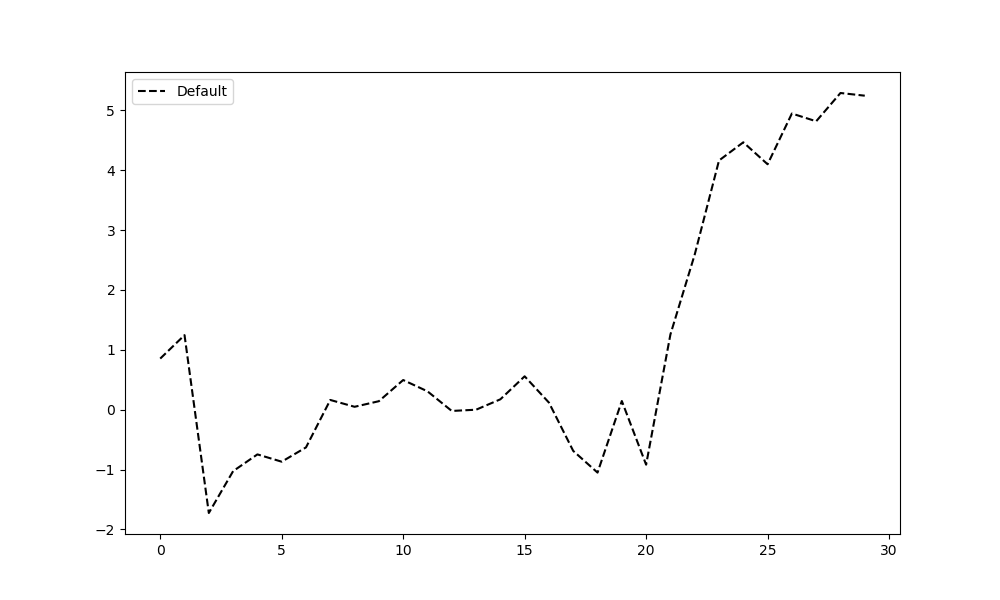

In [73]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

In [68]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [74]:
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


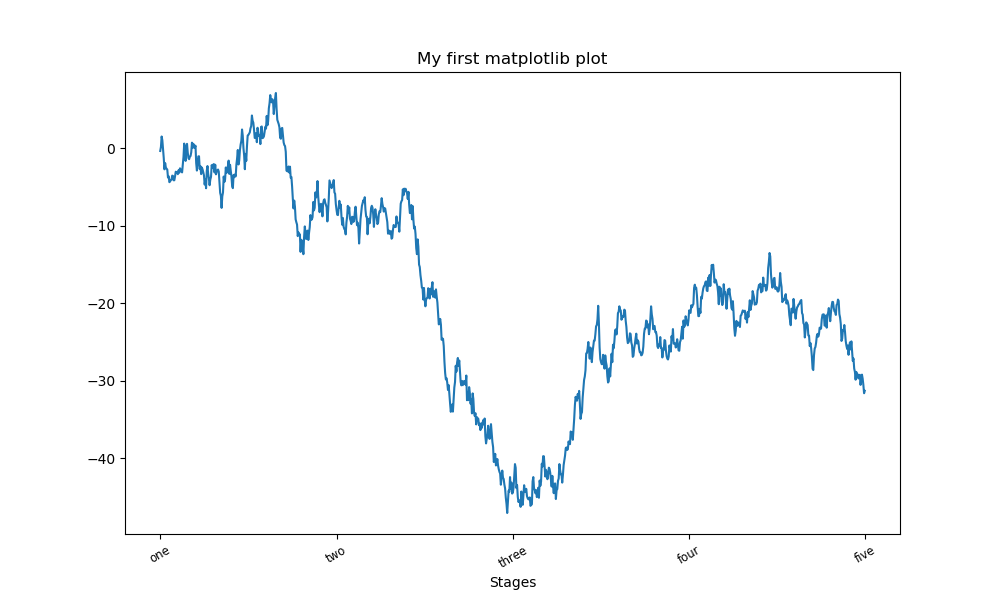

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [95]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [92]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,23.9639,'Stages')

In [96]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,23.9639,'Stages'), Text(0.5,1,'My first matplotlib plot')]

#### Adding legends

<IPython.core.display.Javascript object>


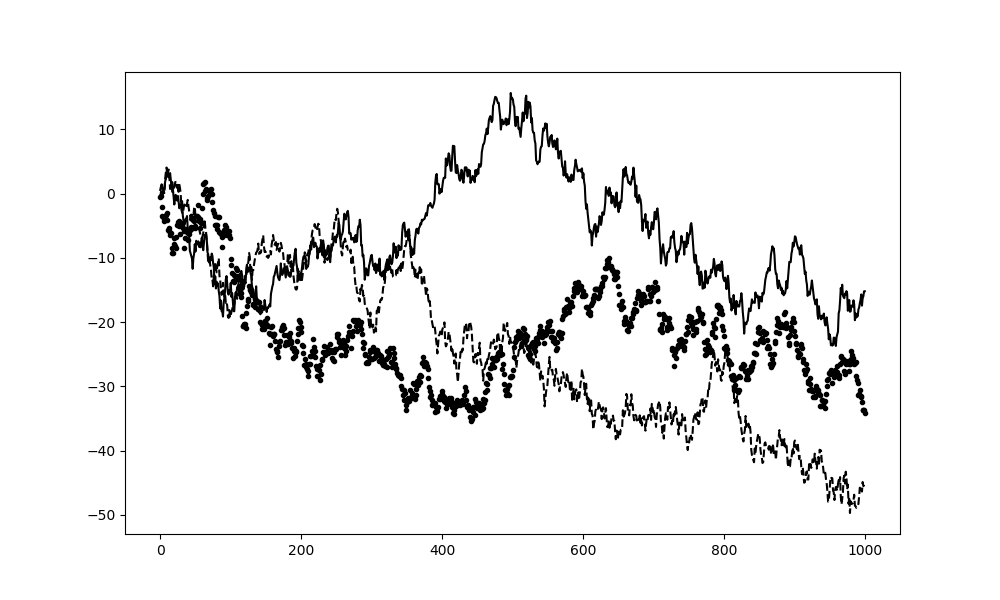

In [97]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [98]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [99]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [100]:
ax.legend(loc='best')

In [101]:
ax.legend?

### Annotations and Drawing on a Subplot

<IPython.core.display.Javascript object>


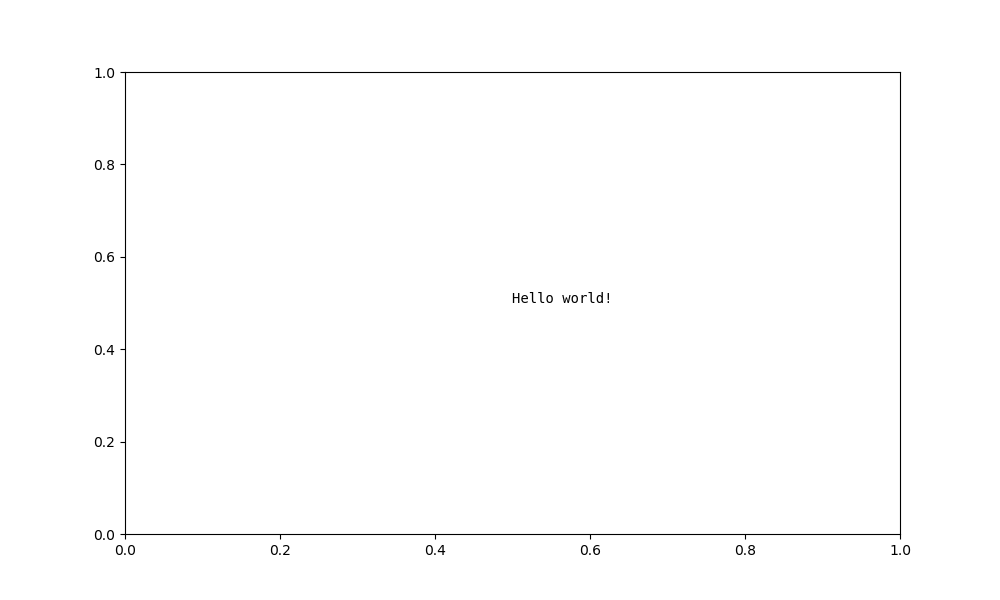

Text(0.5,0.5,'Hello world!')

In [106]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.text(0.5, 0.5, 'Hello world!',
        family='monospace', fontsize=10)

In [143]:
from datetime import datetime

<IPython.core.display.Javascript object>


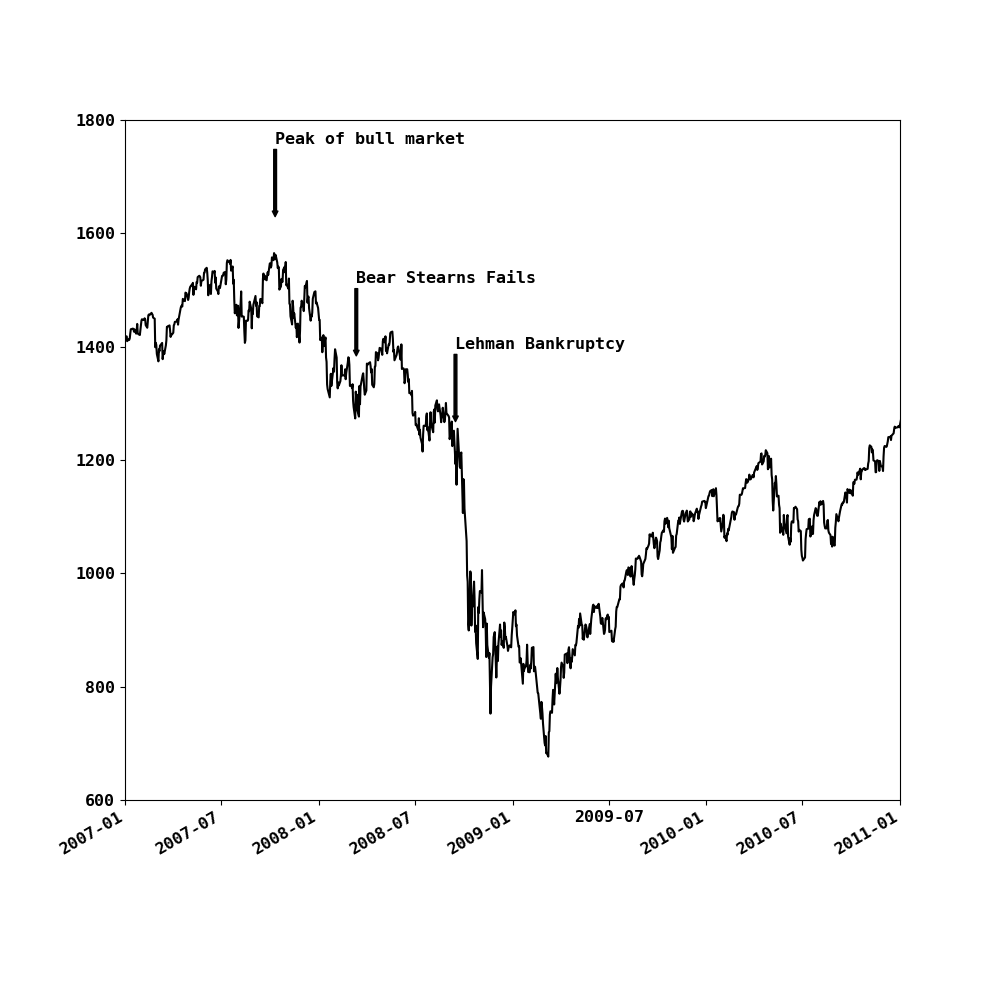

In [144]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [145]:
data = pd.read_csv('pydata-book-2nd-edition/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

In [146]:
spx.plot(ax=ax, style='k-')

In [147]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [148]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

In [149]:
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

(600, 1800)

In [125]:
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


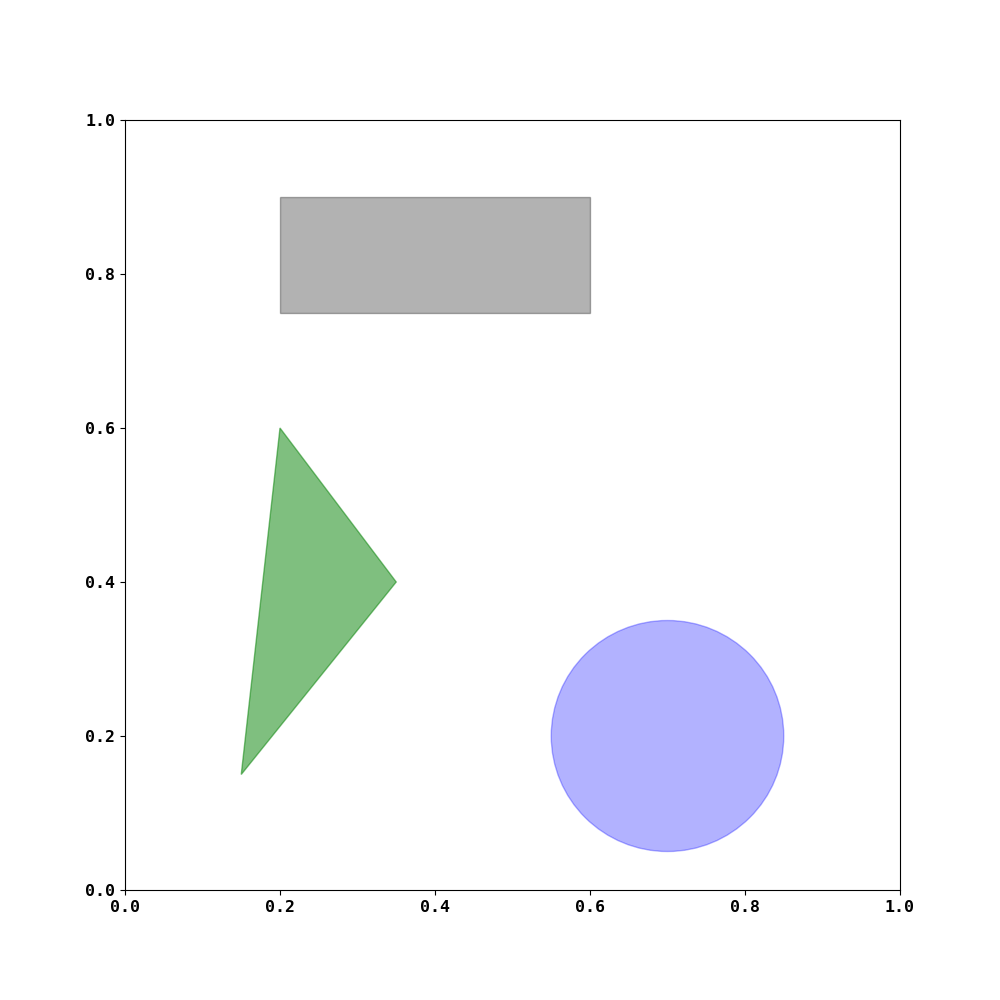

In [137]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [138]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

In [139]:
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

<IPython.core.display.Javascript object>


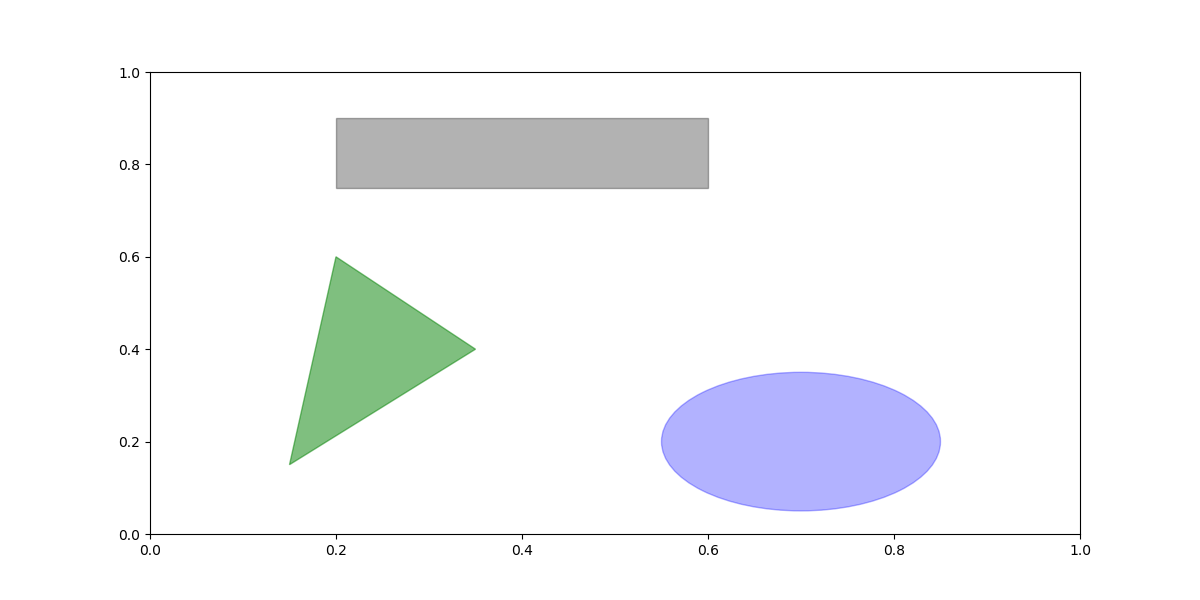

In [129]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

In [130]:
plt.savefig('figpath.svg')

In [131]:
plt.savefig('figpath.pdf')

In [132]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [133]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

In [140]:
plt.rc('figure', figsize=(10, 10))

In [141]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : '12'}
plt.rc('font', **font_options)

<IPython.core.display.Javascript object>


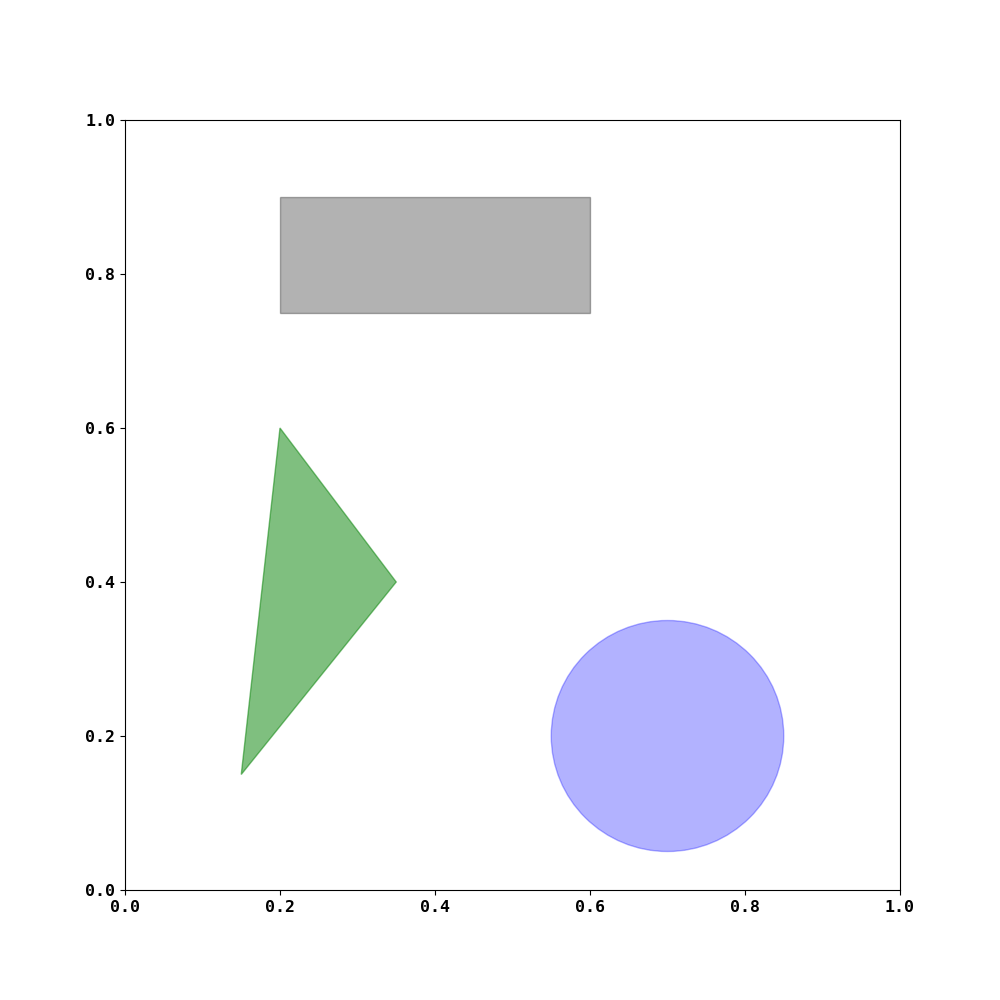

In [142]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 9.2 Plotting with pandas and seaborn

### Line Plots

In [ ]:
plt.close('all')

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
np.random.seed(12348)

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [ ]:
plt.figure()

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
plt.close('all')

In [ ]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [ ]:
plt.close('all')

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [ ]:
plt.close('all')

In [ ]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
plt.figure()

In [ ]:
tips['tip_pct'].plot.density()

In [ ]:
plt.figure()

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [ ]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
plt.figure()

In [ ]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

In [ ]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion